In [56]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import numpy as np

In [58]:
#Read data and make sure dates are indexed
df=pd.read_csv('ARIMA/MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [59]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


Plot Your Data

<Axes: xlabel='DATE'>

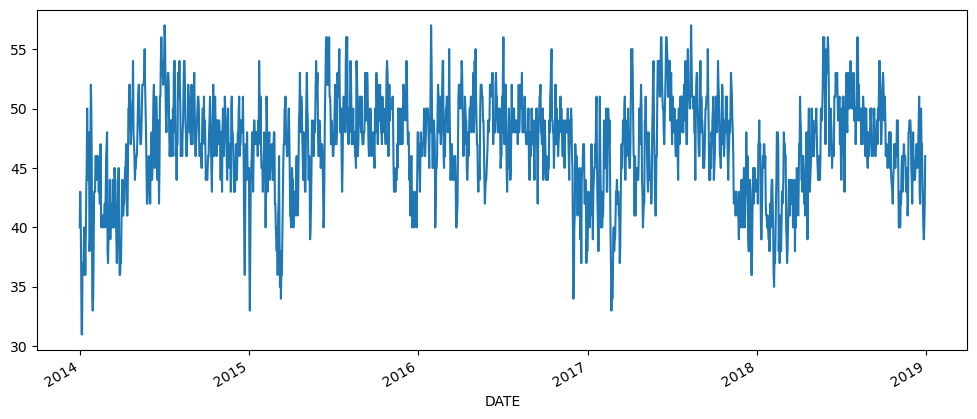

In [60]:
df['AvgTemp'].plot(figsize=(12,5))

Check for Stationary

In [61]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ",dftest[1])
    print("3. Num of Lags : ",dftest[2])
    print("4. Num of Obeservations Used For ADF Regression and Critical Values Caclculation :",dftest[3])
    print("5. Critical Vaues : ")
    for key, val in dftest[4].items():
        print("/t",key, ": ", val)

In [62]:
ad_test(df['AvgTemp'])  #If the p-value is high it means the dataset is not stationary

1. ADF :  -6.554680125068738
2. P-Value :  8.675937480201557e-09
3. Num of Lags :  12
4. Num of Obeservations Used For ADF Regression and Critical Values Caclculation : 1808
5. Critical Vaues : 
/t 1% :  -3.433972018026501
/t 5% :  -2.8631399192826676
/t 10% :  -2.5676217442756872


Figure out the order for ARIMA model

In [63]:
from pmdarima import auto_arima 
 #Ignore Harmless Warnings
import warnings
warnings.filterwarnings("ignore")

In [64]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
                               supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.145, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.72 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.242, Time=1.04 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.896, Time=1.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=1.10 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.653, Time=1.24 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.393, Time=1.54 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.555, Time=2.12 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.937, Time=1.79 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.756
Date:                Fri, 16 Feb 2024   AIC                           8295.512
Time:                        18:25:54   BIC                           8339.569
Sample:                             0   HQIC                          8311.766
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2594      0.375      3.357      0.001       0.524       1.995
ar.L1          0.9728      0.008    120.068      0.000       0.957       0.989
ma.L1         -0.1241      0.024     -5.196      0.000      -0.171      -0.077
ma.L2         -0.2181      0.024     -8.975      0.000      -0.266      -0.170
ma.L3         -0.2053      0.024     -8.543      0.000      -0.252      -0.158
ma.L4         -0.1373      0.023     -5.997      0.000      -0.182      -0.092
ma.L5         -0.0482      0.025     -1.967      0.049      -0.096      -0.000
sigma2         5.5223      0.174     31.814      0.000       5.182       5.863
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we begin fitting the model 

In [65]:
from statsmodels.tsa.arima.model import ARIMA

Split data into training and testing

In [66]:
print (df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


Train the model

In [86]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 16 Feb 2024   AIC                           8156.395
Time:                        18:56:16   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Make predicitons on Test Set

In [87]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1] #To get dates for prediction model
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874127
2018-12-07    45.884370
2018-12-08    45.894467
2018-12-09    45.904418
2018-12-10    45.914225
2018-12-11    45.923892
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961186
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996378
2018-12-20    46.004861
2018-12-21    46.013223
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053259
2018-12-27    46.060923
2018-12-28    46.068478
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


DATE
2018-12-26    46.053259
2018-12-27    46.060923
2018-12-28    46.068478
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64

<Axes: xlabel='DATE'>

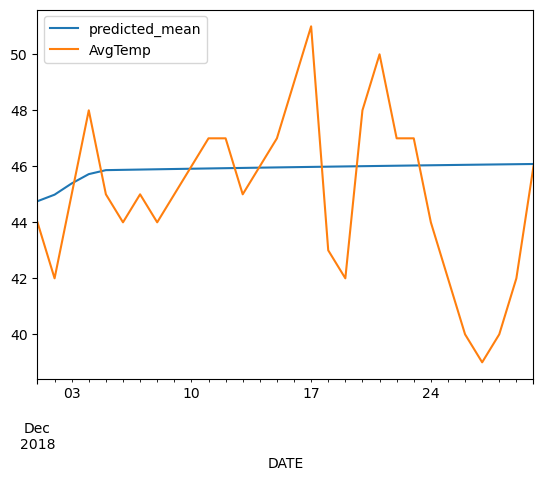

In [73]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [89]:
test['AvgTemp'].mean()

45.0

In [90]:
pred.mean()

45.87761036368276

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000464012421487


In [76]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


For Future dates

In [84]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates#To get dates for prediction model
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136666
2019-01-05    45.156140
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212943
2019-01-09    45.231349
2019-01-10    45.249499
2019-01-11    45.267394
2019-01-12    45.285039
2019-01-13    45.302437
2019-01-14    45.319591
2019-01-15    45.336506
2019-01-16    45.353184
2019-01-17    45.369628
2019-01-18    45.385843
2019-01-19    45.401830
2019-01-20    45.417594
2019-01-21    45.433137
2019-01-22    45.448463
2019-01-23    45.463574
2019-01-24    45.478474
2019-01-25    45.493166
2019-01-26    45.507652
2019-01-27    45.521935
2019-01-28    45.536018
2019-01-29    45.549904
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

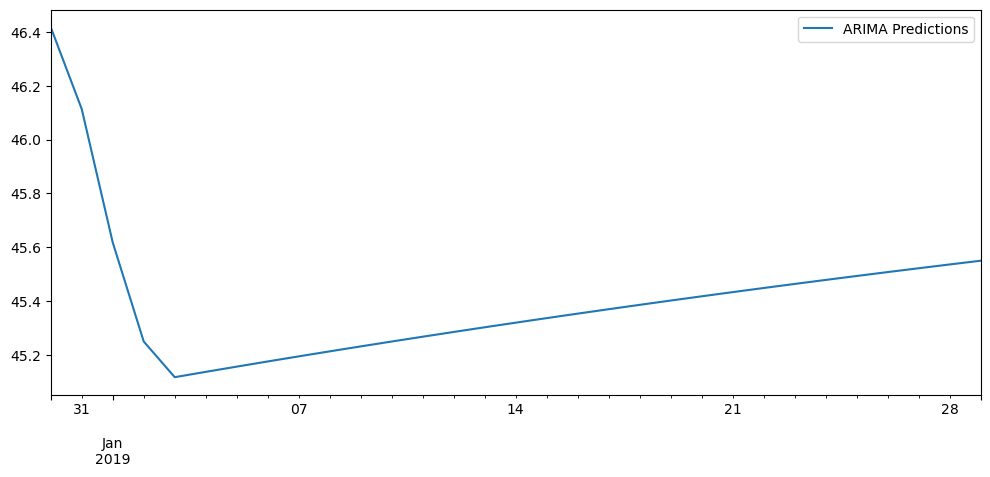

In [83]:
pred.plot(figsize=(12,5),legend=True)